<a href="https://colab.research.google.com/github/shailshree23/ML_Lab/blob/main/MNISIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Preprocess the data
# Reshape images to add a channel dimension (for grayscale, it's 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [3]:
# Build the CNN model
model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output to feed into dense layers
model.add(layers.Flatten())

# Dense layers for classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 classes for digits 0-9

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8976 - loss: 0.3322 - val_accuracy: 0.9869 - val_loss: 0.0423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9870 - val_loss: 0.0379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9854 - val_loss: 0.0432
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9892 - val_loss: 0.0359
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9874 - val_loss: 0.0408


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.9874 - loss: 0.0408

Test accuracy: 0.9873999953269958
313/313 - 3s - 8ms/step - accuracy: 0.9874 - loss: 0.0408

Test accuracy: 0.9873999953269958


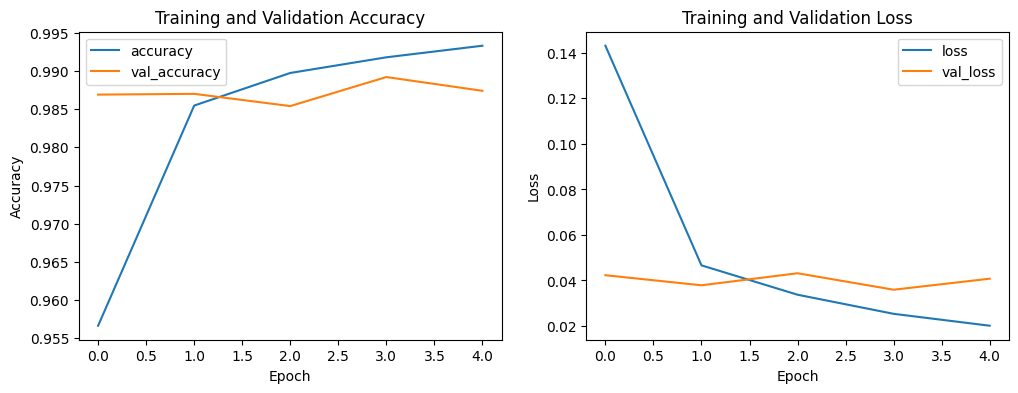

In [7]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


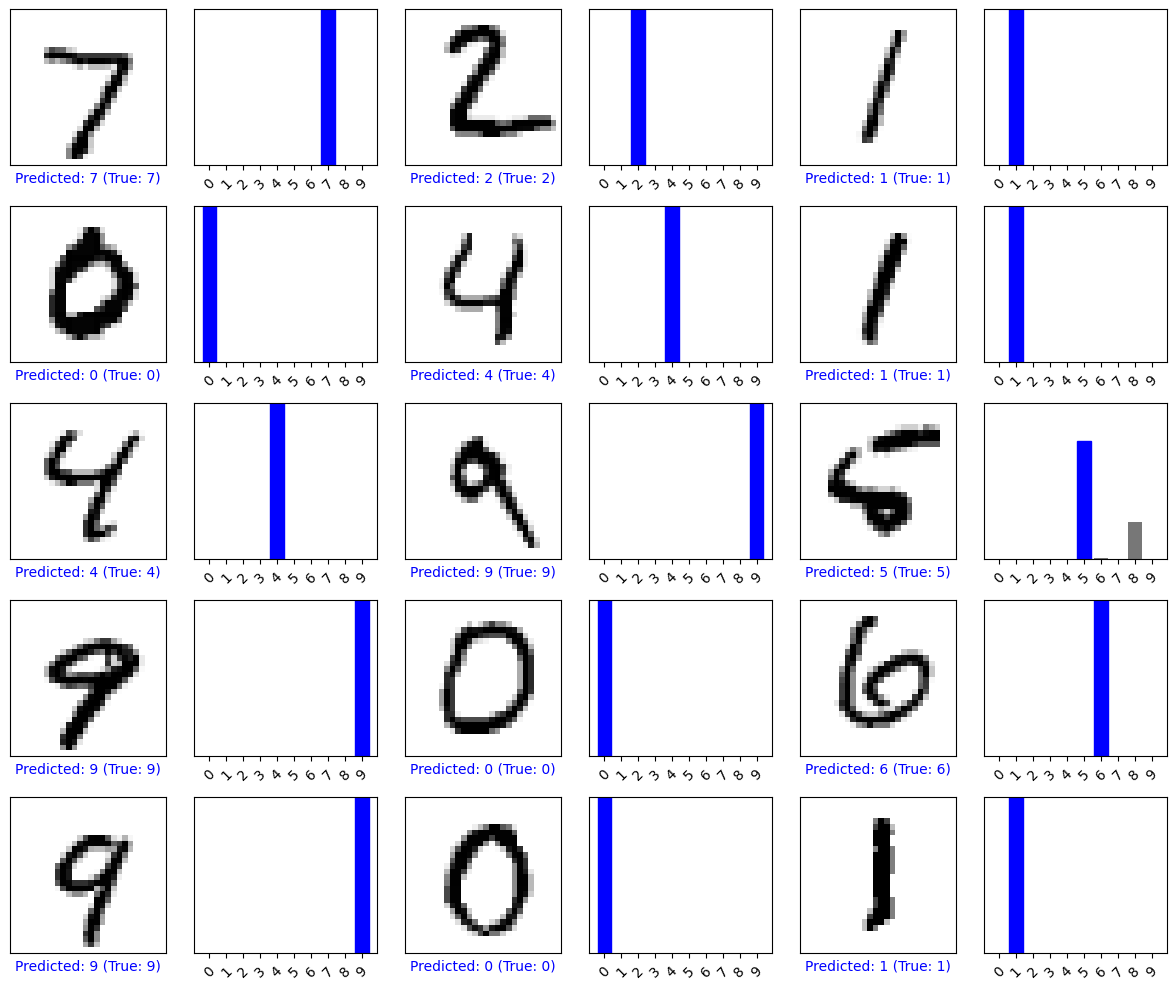

In [8]:
# Make predictions on a few test images
predictions = model.predict(test_images)

# Function to plot image, predicted and true labels
def plot_image(i, predictions_array, true_label, img):
    true_label = np.argmax(true_label)
    img = img.reshape((28, 28)) # Reshape for plotting
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {predicted_label} (True: {true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(10), rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

--- 1. Data Overview ---
Full Training Data Shape: (60000, 28, 28)
Full Training Labels Shape: (60000,)
Test Data Shape: (10000, 28, 28)
Test Labels Shape: (10000,)
Pixel Value Range: Min=0, Max=255
Mean Pixel Value: 33.32
Standard Deviation of Pixel Values: 78.57


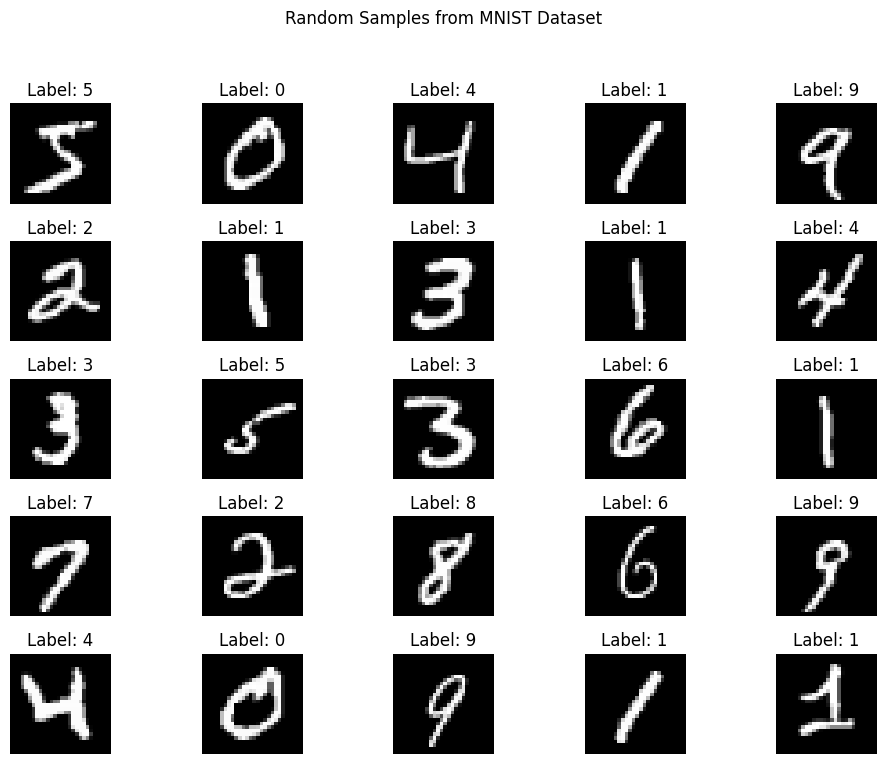

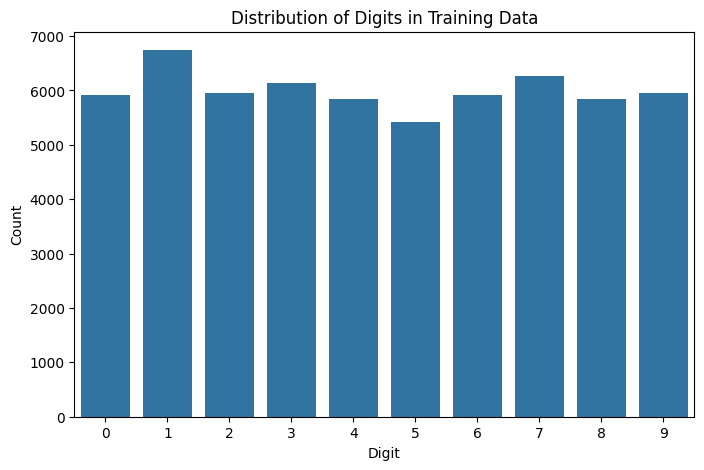


--- 2. Normalizing Pixel Values ---
Normalized Pixel Value Range: Min=0.0, Max=1.0
Reshaped Training Data Shape for CNN: (60000, 28, 28, 1)
One-hot encoded label shape: (60000, 10)

--- 3. Splitting Data into Train, Validation, Test Sets ---
Training Data Shape: (51000, 28, 28, 1)
Validation Data Shape: (9000, 28, 28, 1)
Test Data Shape: (10000, 28, 28, 1)
Training Labels Shape: (51000, 10)
Validation Labels Shape: (9000, 10)
Test Labels Shape: (10000, 10)

--- 4. Building and Training the CNN Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.8308 - loss: 0.5265 - val_accuracy: 0.9800 - val_loss: 0.0668
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9692 - loss: 0.1034 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9792 - loss: 0.0673 - val_accuracy: 0.9869 - val_loss: 0.0443
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.9833 - loss: 0.0572 - val_accuracy: 0.9890 - val_loss: 0.0352
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9909 - val_loss: 0.0323
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9899 - val_loss: 0.0350
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9910 - val_loss: 0.0314
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9890 - loss: 0.0315 - 

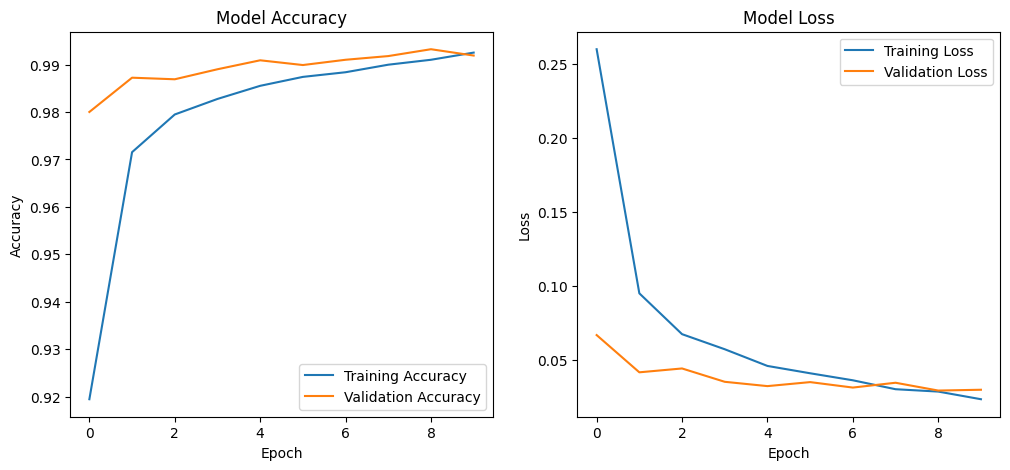


--- 5. Evaluating Model Performance ---
Test Loss: 0.0276
Test Accuracy: 0.9908
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


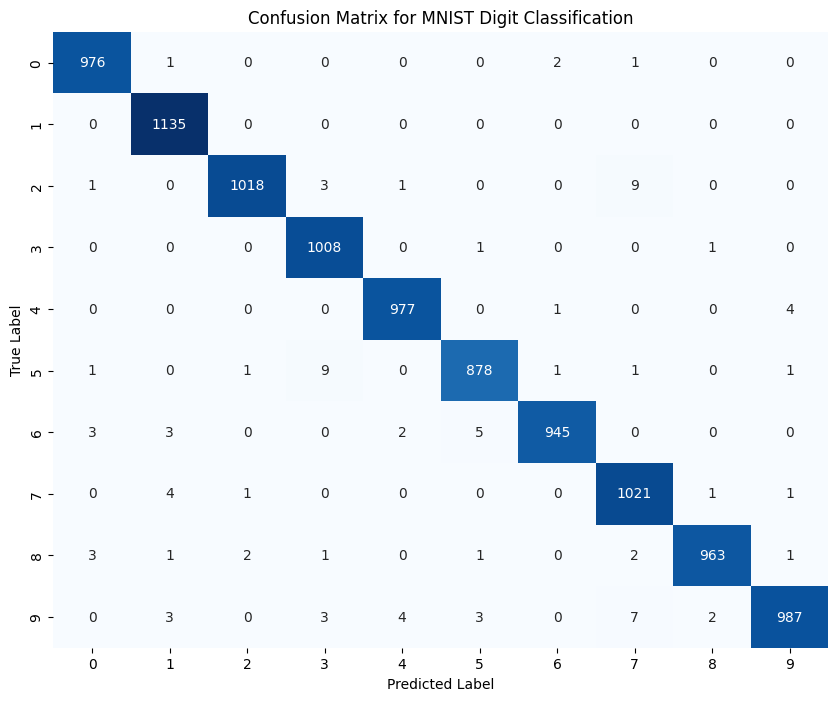


--- 6. Plotting Misclassified Digits ---


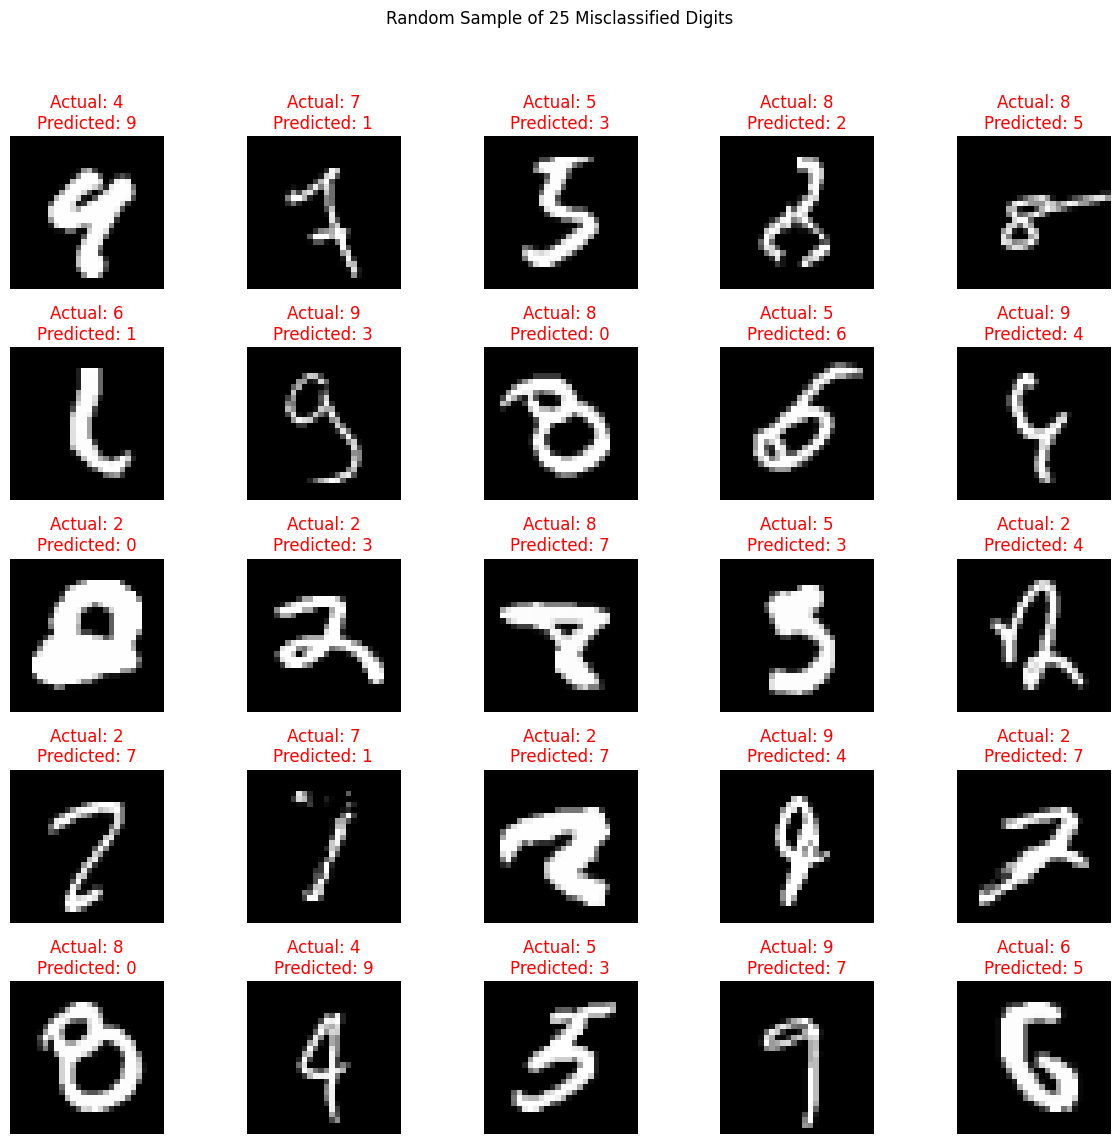


--- 7. Analysis of Model Failures ---
Misclassifications often occur due to:
  - Ambiguous Handwriting: Digits that are poorly formed or resemble other digits (e.g., a '4' looking like a '9' or an open '8' looking like a '0').
  - Variations in Stroke Thickness and Style: Extremely thin or thick strokes, unusual loops, or disconnected segments.
  - Rotations and Slants: Digits written at unusual angles.
  - Noise: Any imperfections in the image data itself, though MNIST is relatively clean.
  - Insufficient Training Data for Specific Styles: If certain handwriting styles are underrepresented in the training set.
  - Model Complexity: A simpler model might not capture intricate patterns, while an overly complex one might overfit.
The misclassified examples plotted above often demonstrate these challenges directly.


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Overview: Shape, Labels, Pixel Distribution, and Random Samples ---

print("--- 1. Data Overview ---")

# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

print(f"Full Training Data Shape: {X_train_full.shape}")
print(f"Full Training Labels Shape: {y_train_full.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}")

# Pixel distribution
print(f"Pixel Value Range: Min={X_train_full.min()}, Max={X_train_full.max()}")
print(f"Mean Pixel Value: {X_train_full.mean():.2f}")
print(f"Standard Deviation of Pixel Values: {X_train_full.std():.2f}")

# Visualize random samples
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.suptitle("Random Samples from MNIST Dataset")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_full)
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# --- 2. Normalise Pixel Values ---

print("\n--- 2. Normalizing Pixel Values ---")
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Normalized Pixel Value Range: Min={X_train_full.min()}, Max={X_train_full.max()}")

# Reshape data for CNN (add channel dimension)
# MNIST images are 28x28 grayscale, so we need a single channel (height, width, channels)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Reshaped Training Data Shape for CNN: {X_train_full.shape}")

# Convert labels to one-hot encoding
y_train_full_cat = to_categorical(y_train_full, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(f"One-hot encoded label shape: {y_train_full_cat.shape}")

# --- 3. Split Data into Train, Validation, Test Sets ---

print("\n--- 3. Splitting Data into Train, Validation, Test Sets ---")
# Use train_test_split to create validation set from full training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_cat, test_size=0.15, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Validation Labels Shape: {y_val.shape}")
print(f"Test Labels Shape: {y_test_cat.shape}") # Note: y_test_cat for model eval, y_test for confusion matrix


# --- 4. Build and Train a Convolutional Neural Network (CNN) ---

print("\n--- 4. Building and Training the CNN Model ---")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(10, activation='softmax') # Output layer for 10 digits
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- 5. Evaluate Accuracy and Confusion Matrix ---

print("\n--- 5. Evaluating Model Performance ---")

test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MNIST Digit Classification")
plt.show()

# --- 6. Plot Misclassified Digits ---

print("\n--- 6. Plotting Misclassified Digits ---")

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

# Select a random subset of misclassified digits to plot
num_misclassified_to_plot = min(25, len(misclassified_idx))
if num_misclassified_to_plot > 0:
    random_misclassified_indices = np.random.choice(misclassified_idx, num_misclassified_to_plot, replace=False)

    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(random_misclassified_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title(f"Actual: {y_test[idx]}\nPredicted: {y_pred[idx]}", color='red')
        plt.axis('off')
    plt.suptitle(f"Random Sample of {num_misclassified_to_plot} Misclassified Digits")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("No misclassified digits found (highly unlikely for a real model) or test set too small.")

# --- 7. Analyze where Classical Models Fail (Conceptual Discussion) ---

print("\n--- 7. Analysis of Model Failures ---")
print("Misclassifications often occur due to:")
print("  - Ambiguous Handwriting: Digits that are poorly formed or resemble other digits (e.g., a '4' looking like a '9' or an open '8' looking like a '0').")
print("  - Variations in Stroke Thickness and Style: Extremely thin or thick strokes, unusual loops, or disconnected segments.")
print("  - Rotations and Slants: Digits written at unusual angles.")
print("  - Noise: Any imperfections in the image data itself, though MNIST is relatively clean.")
print("  - Insufficient Training Data for Specific Styles: If certain handwriting styles are underrepresented in the training set.")
print("  - Model Complexity: A simpler model might not capture intricate patterns, while an overly complex one might overfit.")
print("The misclassified examples plotted above often demonstrate these challenges directly.")

